<a href="https://colab.research.google.com/github/mallibus/DSS-NLP-challenge/blob/master/DSS_NLP_Challenge_Recurrent_Neural_Network_in_TensorFlow_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![DSS7-NPL Challenge](http://www.datascienceseed.com/wp-content/uploads/2019/07/DSS-CHALLENGE-300x169.jpg)



## Step 1: Installing the dependencies and setting up a GPU environment

In [2]:
!pip install tensorflow-gpu==2.0.0.alpha0

     |████████████████████████████████| 332.1MB 75kB/s 
     |████████████████████████████████| 419kB 45.3MB/s 
     |████████████████████████████████| 3.0MB 25.1MB/s 


## Step 2: Importing the libraries

In [0]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb

In [4]:
tf.__version__

'2.0.0-alpha0'

In [0]:
# Function for plotting learning history

from matplotlib import pyplot as plt
%matplotlib inline

def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

## Connection with my local Google Drive

I tried to use the sharable link to make this more general, but I got errors with big dataset, so ... for now this is how it is

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Dataset Path will be used for models saving as well

dataset_path = "/content/drive/My Drive/AIML/Projects/DSS-NLP-challenge/dataset/wiki/"
dataset_name = "dss_wiki_02000_20K1"
dataset_file = dataset_name+".json"

import urllib.request

url_wiki = 'https://drive.google.com/file/d/1HZxMVthzG-tboMXO0qsPkeH2Cuq1YCbi/view?usp=sharing' # 2000

url_wiki = 'https://drive.google.com/uc?export=download&id=1iteaiSPd1OLJdKZitcv76LzrD_mAC8S8'# 5

url_wiki = 'https://drive.google.com/uc?export=download&id=15hhpN2EszdRx7-PN43yGFsoFPuZzwFO1'   # 200

f = urllib.request.urlopen(url_wiki)



## Step 3: Data Preprocessing

### Load the data

In [8]:
import json

with open(dataset_path+dataset_file, 'r') as f:
  dss = json.load(f)

print(f"Dataset of {len(dss['X'])} texts of {len(set(dss['y']))} classes - vocabulary of {len(dss['word_index'])} words")
print(dss['categories'])

Dataset of 8977 texts of 6 classes - vocabulary of 212852 words
['Economy', 'Regulation', 'Environment', 'Health', 'Industry', 'Cultures']


In [9]:
dss.keys()

dict_keys(['max_i', 'max_words', 'word_index', 'categories', 'X', 'y'])

### Setting up the dataset parameters

In [0]:
number_of_words = len(dss['word_index'])
max_len = 500

In [0]:
import numpy as np

In [0]:
X_arr = np.array(dss['X'])
y_arr = np.array(dss['y'])
ylabels = dss['categories']


In [13]:
split = 0.2

dataset_size = len(y_arr)
test_size    = int(dataset_size * split)
train_size   = dataset_size - test_size
test_indexes  = np.random.choice(range(dataset_size),test_size,replace=False)
train_indexes =  np.array(list(set(range(dataset_size)) - set(test_indexes)))
np.random.shuffle(train_indexes)
dataset_size,len(train_indexes),len(test_indexes)            

(8977, 7182, 1795)

In [0]:
(X_train, y_train), (X_test, y_test) = (X_arr[train_indexes],y_arr[train_indexes]),(X_arr[test_indexes],y_arr[test_indexes])

### Explore some articles


In [0]:
id_to_word = {dss['word_index'][key]:key for key in dss['word_index'].keys()}

In [22]:
id_to_word[2]

'the'

In [23]:
import textwrap
size = 2
sample = np.random.choice(range(len(X_train)),size,replace=False)
for i in sample:
    print(f'Text #{i}:{ylabels[y_train[i]]}, {len(X_train[i])} words')
    s = ' '.join(id_to_word[id] for id in X_train[i])
    print('\n'.join(textwrap.wrap(s, width=100, replace_whitespace=False)))
    print()



Text #1172:Environment, 924 words
xxxunk greek for those who bear toxins is a proposed clade of scaled reptiles xxxunk that includes
the xxxunk snakes xxxunk monitor lizards xxxunk monster and xxxunk lizards and xxxunk xxxunk xxxunk
and xxxunk xxxunk contains about 4 600 species nearly 60 of extant xxxunk it encompasses all xxxunk
xxxunk species as well as numerous related non xxxunk species there is little morphological evidence
to support this grouping however it has been recovered by all molecular analyses as of 2012 xxxunk
xxxunk combines the following groups from traditional classification xxxunk xxxunk snakes xxxunk
xxxunk xxxunk xxxunk lizards xxxunk etc xxxunk xxxunk consisting of family xxxunk monitor lizards
family xxxunk xxxunk lizards glass lizards etc family xxxunk xxxunk monster and mexican xxxunk
lizard family xxxunk chinese crocodile lizard family xxxunk xxxunk scaled lizards detailed xxxunk in
xxxunk et al 2015 fig 1 venom venom in xxxunk has historically been consider

### Padding all sequences to be the same length 

In [0]:
# Changing variable name to preserve orginal dataset
#X_train_p = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_len,padding='post', truncating='post')
X_train_p = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)
X_test_p = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)


## Step 4: Building a Recurrent Neural Network

### Defining the model

In [0]:
model = tf.keras.Sequential()

### Adding the embedding layer

In [0]:
model.add(tf.keras.layers.Embedding(input_dim=number_of_words, output_dim=128, input_shape=(X_train_p.shape[1],)))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 128)          27245056  
Total params: 27,245,056
Trainable params: 27,245,056
Non-trainable params: 0
_________________________________________________________________


### Adding the LSTM layer

- units: 128
- activation: tanh

In [25]:
model.add(tf.keras.layers.LSTM(units=128, activation='tanh'))

W0802 20:39:50.460058 140416340780928 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7fb4ba354518>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.


### Adding the output layer

- units: 1
- activation: sigmoid

In [0]:
model.add(tf.keras.layers.Dense(units=len(ylabels), activation='softmax'))

### Compiling the model

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 128)          27245056  
_________________________________________________________________
unified_lstm (UnifiedLSTM)   (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 6)                 774       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
Total params: 27,377,498
Trainable params: 27,377,498
Non-trainable params: 0
_________________________________________________________________


### Training the model

In [31]:
model.fit(X_train_p, y_train, epochs=5, batch_size=16,validation_split=0.1)

Train on 6463 samples, validate on 719 samples
Epoch 1/5
6463/6463 [==============================] - 19s 3ms/sample - loss: 1.7801 - sparse_categorical_accuracy: 0.2174 - val_loss: 1.7778 - val_sparse_categorical_accuracy: 0.2211
Epoch 2/5
6463/6463 [==============================] - 15s 2ms/sample - loss: 1.7225 - sparse_categorical_accuracy: 0.3090 - val_loss: 1.6973 - val_sparse_categorical_accuracy: 0.2768
Epoch 3/5
6463/6463 [==============================] - 15s 2ms/sample - loss: 1.6112 - sparse_categorical_accuracy: 0.3469 - val_loss: 1.5914 - val_sparse_categorical_accuracy: 0.3310
Epoch 4/5
6463/6463 [==============================] - 15s 2ms/sample - loss: 1.5533 - sparse_categorical_accuracy: 0.3444 - val_loss: 1.5865 - val_sparse_categorical_accuracy: 0.3241
Epoch 5/5
6463/6463 [==============================] - 15s 2ms/sample - loss: 1.4145 - sparse_categorical_accuracy: 0.3740 - val_loss: 1.5044 - val_sparse_categorical_accuracy: 0.3282


### Evaluating the model

In [32]:
test_loss, test_acurracy = model.evaluate(X_test_p, y_test)
print("Test accuracy: {}".format(test_acurracy))

1795/1795 [==============================] - 1s 399us/sample - loss: 1.5421 - sparse_categorical_accuracy: 0.3153
Test accuracy: 0.31532034277915955


## Step 5: Evaluate other architrectures

Inspiration for various architectures comes from [here](https://realpython.com/python-keras-text-classification/#convolutional-neural-networks-cnn)



###  LSTM Baseline

In [0]:
model_name = "_lstm"

W0802 20:59:04.792362 140416340780928 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7fb46441eef0>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.


Train on 6463 samples, validate on 719 samples
Epoch 1/5
6463/6463 [==============================] - 3s 484us/sample - loss: 1.7581 - sparse_categorical_accuracy: 0.2825 - val_loss: 1.7074 - val_sparse_categorical_accuracy: 0.3435
Epoch 2/5
6463/6463 [==============================] - 3s 420us/sample - loss: 1.4157 - sparse_categorical_accuracy: 0.5047 - val_loss: 1.0262 - val_sparse_categorical_accuracy: 0.6384
Epoch 3/5
6463/6463 [==============================] - 3s 422us/sample - loss: 0.7476 - sparse_categorical_accuracy: 0.7368 - val_loss: 0.8492 - val_sparse_categorical_accuracy: 0.7107
Epoch 4/5
6463/6463 [==============================] - 3s 421us/sample - loss: 0.4011 - sparse_categorical_accuracy: 0.8802 - val_loss: 0.8371 - val_sparse_categorical_accuracy: 0.7455
Epoch 5/5
6463/6463 [==============================] - 3s 424us/sample - loss: 0.2261 - sparse_categorical_accuracy: 0.9373 - val_loss: 0.8737 - val_sparse_categorical_accuracy: 0.7385


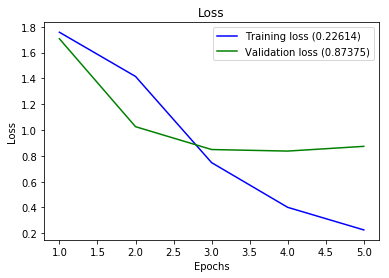

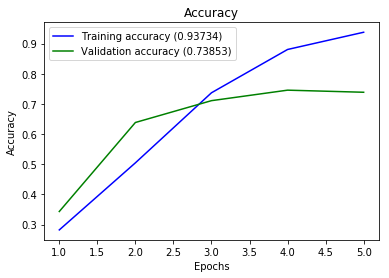

1795/1795 [==============================] - 1s 325us/sample - loss: 0.9256 - sparse_categorical_accuracy: 0.7086
Test accuracy: 0.7086350917816162


In [35]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=number_of_words, output_dim=128, input_shape=(X_train_p.shape[1],)))
model.add(tf.keras.layers.LSTM(units=128, activation='tanh'))
#model.add(tf.keras.layers.GlobalAveragePooling1D())
#model.add(tf.keras.layers.Dense(units=128, activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.Dense(units=128, activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=len(ylabels), activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
history = model.fit(X_train_p, y_train, epochs=5, batch_size=128,validation_split=0.1)
plot_history(history)
test_loss, test_acurracy = model.evaluate(X_test_p, y_test)
print("Test accuracy: {}".format(test_acurracy))

### Global max pooling after Embedding layer

In [0]:
model_name = "_globmaxp"

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 128)          27245056  
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 774       
Total params: 27,245,830
Trainable params: 27,245,830
Non-trainable params: 0
_________________________________________________________________
Train on 6463 samples, validate on 719 samples
Epoch 1/10
6463/6463 [==============================] - 1s 187us/sample - loss: 1.7663 - sparse_categorical_accuracy: 0.2833 - val_loss: 1.7283 - val_sparse_categorical_accuracy: 0.3408
Epoch 2/10
6463/6463 [==============================] - 1s 162us/sample - loss: 1.6681 - sparse_categorical_accuracy: 0.3678 - val_loss: 1.

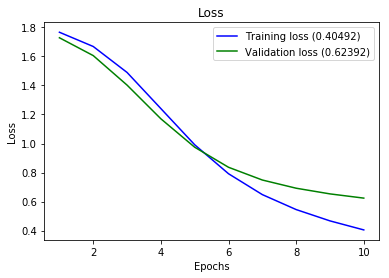

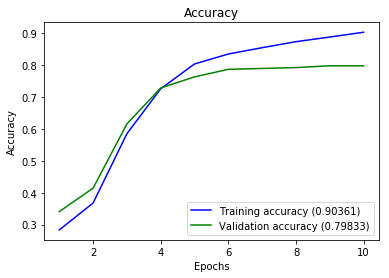

1795/1795 [==============================] - 0s 75us/sample - loss: 0.6305 - sparse_categorical_accuracy: 0.8017
Test accuracy: 0.8016713261604309


In [37]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=number_of_words, output_dim=128, input_shape=(X_train_p.shape[1],)))
#model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.GlobalMaxPooling1D())
#model.add(tf.keras.layers.LSTM(units=128, activation='tanh'))
#model.add(tf.keras.layers.GlobalAveragePooling1D())
#model.add(tf.keras.layers.Dense(units=128, activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.Dense(units=128, activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=len(ylabels), activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
model.summary()
history = model.fit(X_train_p, y_train, epochs=10, batch_size=128,validation_split=0.1)
plot_history(history)
test_loss, test_acurracy = model.evaluate(X_test_p, y_test)
print("Test accuracy: {}".format(test_acurracy))

### 1D Convolution + MaxPooling + Flattening

In [0]:
model_name = "_1dconv_axp_flat"

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 128)          27245056  
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 128)          82048     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 124, 128)          0         
_________________________________________________________________
flatten (Flatten)            (None, 15872)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 95238     
Total params: 27,422,342
Trainable params: 27,422,342
Non-trainable params: 0
_________________________________________________________________
Train on 6463 samples, validate on 719 samples
Epoch 1/10
6463/6463 [==============================] - 2s 29

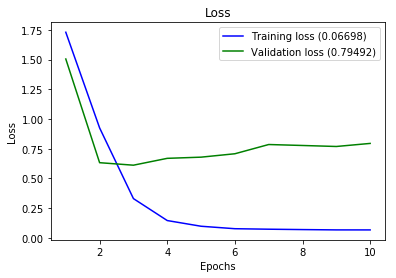

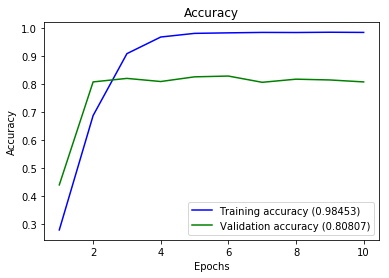

1795/1795 [==============================] - 0s 91us/sample - loss: 0.7706 - sparse_categorical_accuracy: 0.7950
Test accuracy: 0.7949860692024231


In [39]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=number_of_words, output_dim=128, input_shape=(X_train_p.shape[1],)))
#model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Conv1D(128, 5, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=4))
model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.LSTM(units=128, activation='tanh'))
#model.add(tf.keras.layers.GlobalAveragePooling1D())
#model.add(tf.keras.layers.Dense(units=128, activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=len(ylabels), activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
model.summary()
history = model.fit(X_train_p, y_train, epochs=10, batch_size=128,validation_split=0.1)
plot_history(history)
test_loss, test_acurracy = model.evaluate(X_test_p, y_test)
print("Test accuracy: {}".format(test_acurracy))


### MaxPooling (local) + Flattening

In [0]:
model_name = "_maxp_flat"

In [43]:
import textwrap

size = 3
sample = np.random.choice(range(len(X_test)),size)
predictions = model.predict_classes(X_test_p[sample])
for idx,i in enumerate(sample):
    print(f'Review #{i} - {len(X_test[i])} P:{ylabels[predictions[idx]]},A:{ylabels[y_test[sample[idx]]]}')
    s = ' '.join(id_to_word[id] for id in X_test[i])
    print('\n'.join(textwrap.wrap(s, width=100, replace_whitespace=False)))
    print()

Review #1086 - 114 P:Industry,A:Industry
these are wikipedia lists about the pharmaceutical industry the pharmaceutical industry develops
produces and markets drugs or pharmaceuticals licensed for use as medications pharmaceutical
companies are allowed to deal in generic or brand medications and medical devices they are subject
to a variety of laws and regulations regarding the production testing and marketing of drugs list of
pharmaceutical companies list of largest selling pharmaceutical products list of largest
pharmaceutical settlements list of off label promotion pharmaceutical settlements list of
pharmaceutical sciences journals list of pharmaceutical compound number xxxunk list of
pharmaceutical manufacturers in the united kingdom list of pharmaceutical companies in hyderabad
list of pharmaceutical companies in china list of xxxunk products see also

Review #736 - 1607 P:Cultures,A:Cultures
the nine xxxunk are nine historical xxxunk and legendary xxxunk who xxxunk the ideals of 

## Save the model

In [0]:


model_file = dataset_path+dataset_name+model_name+'.h5'
model.save(model_file)

In [44]:
dataset_path

'/content/drive/My Drive/AIML/Projects/DSS-NLP-challenge/dataset/wiki/'

### MaxPooling (local) + Flattening + Shrink to 2 dim

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 500)]             0         
_________________________________________________________________
embedding_19 (Embedding)     (None, 500, 128)          27245056  
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 62, 128)           0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 7936)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)                507968    
_________________________________________________________________
dense_30 (Dense)             (None, 3)                 195       
_________________________________________________________________
dense_31 (Dense)             (None, 6)                 24  

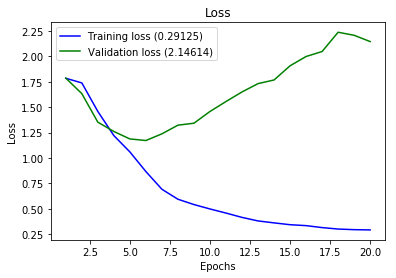

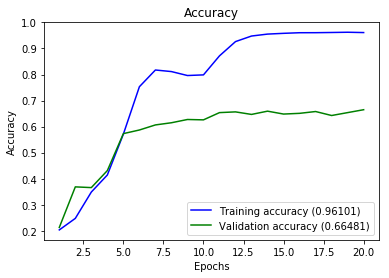

1795/1795 [==============================] - 0s 70us/sample - loss: 2.0894 - sparse_categorical_accuracy: 0.6357
Test accuracy: 0.6356545686721802


In [63]:

# this is our input layer
input_txt = tf.keras.layers.Input(shape=(X_train_p.shape[1],))

# "encoded" is the encoded representation of the input
encoded = tf.keras.layers.Embedding(input_dim=number_of_words, output_dim=128)(input_txt)
encoded = tf.keras.layers.MaxPooling1D(pool_size=8)(encoded)
encoded = tf.keras.layers.Flatten()(encoded)
encoded = tf.keras.layers.BatchNormalization()(encoded)
encoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
#encoded = tf.keras.layers.BatchNormalization()(encoded)
encoded = tf.keras.layers.Dense(3, activation='relu')(encoded)

output = tf.keras.layers.Dense(units=len(ylabels), activation='softmax')(encoded)

# this model maps an input to its reconstruction
model = tf.keras.models.Model(input_txt, output)

model.summary()


# this model maps an input to its encoded representation
#encoder = tf.keras.models.Model(input_img, encoded)

# create a input layer for an encoded (32-dimensional) input to be used by decoder
#encoded_input = tf.keras.layers.Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
#decoder_layer = autoencoder.layers[-1]

# create the decoder model
#decoder = tf.keras.models.Model(encoded_input, decoder_layer(encoded_input))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

history = model.fit(X_train_p, y_train, epochs=20, batch_size=128,validation_split=0.1)
plot_history(history)
test_loss, test_acurracy = model.evaluate(X_test_p, y_test)
print("Test accuracy: {}".format(test_acurracy))


In [0]:
# Optimizers https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
sgd = tf.keras.optimizers.SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)
adad = tf.keras.optimizers.Adadelta(lr=1.0,rho=0.95,epsilon=None,decay=0.0)
adag = tf.keras.optimizers.Adagrad(lr=0.01,epsilon=None,decay=0.0)
adamax = tf.keras.optimizers.Adamax(lr=0.002,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0)
nadam = tf.keras.optimizers.Nadam(lr=0.002,beta_1=0.9,beta_2=0.999,epsilon=None,schedule_decay=0.004)
rms = tf.keras.optimizers.RMSprop(lr=0.001,rho=0.9,epsilon=None,decay=0.0)

# Losses https://keras.io/losses/
loss = ['sparse_categorical_crossentropy','binary_crossentropy','mean_squared_error','mean_absolute_error',
        'categorical_crossentropy','categorical_hinge']

# Metrics  https://www.tensorflow.org/api_docs/python/tf/metrics
metrics = ['accuracy','precision','recall']


W0802 22:03:11.003411 140416340780928 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7fb2d8f15128>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.


Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 500)]             0         
_________________________________________________________________
embedding_22 (Embedding)     (None, 500, 128)          27245056  
_________________________________________________________________
unified_lstm_4 (UnifiedLSTM) (None, 128)               131584    
_________________________________________________________________
dense_37 (Dense)             (None, 3)                 387       
_________________________________________________________________
dense_38 (Dense)             (None, 6)                 24        
Total params: 27,377,051
Trainable params: 27,377,051
Non-trainable params: 0
_________________________________________________________________
Train on 6463 samples, validate on 719 samples
Epoch 1/20
6463/6463 [==============================] - 3s 487us/

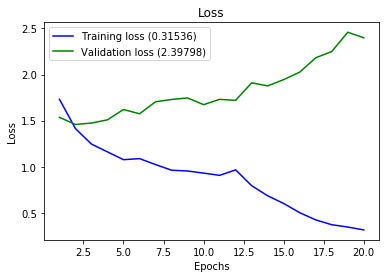

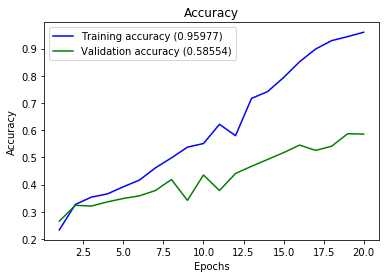

1795/1795 [==============================] - 1s 341us/sample - loss: 2.5995 - sparse_categorical_accuracy: 0.5671
Test accuracy: 0.5671309232711792


In [66]:

# this is our input layer
input_txt = tf.keras.layers.Input(shape=(X_train_p.shape[1],))

# "encoded" is the encoded representation of the input
encoded = tf.keras.layers.Embedding(input_dim=number_of_words, output_dim=128)(input_txt)
encoded = tf.keras.layers.LSTM(units=128, activation='tanh')(encoded)
encoded = tf.keras.layers.Dense(3, activation='relu')(encoded)

output = tf.keras.layers.Dense(units=len(ylabels), activation='softmax')(encoded)

# this model maps an input to its reconstruction
model = tf.keras.models.Model(input_txt, output)

model.summary()


# this model maps an input to its encoded representation
#encoder = tf.keras.models.Model(input_img, encoded)

# create a input layer for an encoded (32-dimensional) input to be used by decoder
#encoded_input = tf.keras.layers.Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
#decoder_layer = autoencoder.layers[-1]

# create the decoder model
#decoder = tf.keras.models.Model(encoded_input, decoder_layer(encoded_input))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

history = model.fit(X_train_p, y_train, epochs=20, batch_size=128,validation_split=0.1)
plot_history(history)
test_loss, test_acurracy = model.evaluate(X_test_p, y_test)
print("Test accuracy: {}".format(test_acurracy))


In [48]:
len(X_train[0])

1500

In [0]:
#print(np.argmin(list(map(len,X_train))[:10]))
#print(X_train[6])
#print(X_train_p[6])

## Import word embedding

In [29]:
import os
glove_dir = '/content/drive/My Drive/AIML/Trainings/2019-07-22 Deep Learning UNIGE/LABs/Lab-2/glove.6B'

embeddings_index = {}

f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8") # for windows encoding "utf8" works; for linux/ios check

# Parse the .txt file to build an index that maps words (as strings) to their vector representation (as number vectors).
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
    
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [30]:
embeddings_index.get('the')

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

Vocab size :  212852


In [41]:
print(list(dss['word_index'].items())[:10])


[('xxxunk', 1), ('the', 2), ('of', 3), ('and', 4), ('in', 5), ('to', 6), ('a', 7), ('is', 8), ('for', 9), ('as', 10)]


In [64]:
word_to_index = dss['word_index'].copy()
word_to_index['xxpad'] = 0

vocab_size = len(word_to_index)
print('Vocab size : ', vocab_size)

Vocab size :  212853


In [65]:
# dimensionality of word embeddings
embedding_dim = 100


# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, embedding_dim))

# unknown words are mapped to zero vector
embedding_matrix[0] = np.array(embedding_dim*[0]) # pad
embedding_matrix[1] = np.array(embedding_dim*[0]) # xxunk

for word, i in word_to_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector.copy() 
    #else :
        #print(word, ' not found in GLoVe file.')

nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
print('Coverage = ', nonzero_elements / vocab_size)

Coverage =  0.5255974780717209


In [166]:

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_shape=(X_train_p.shape[1],)))
model.add(tf.keras.layers.Conv1D(128, 5, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=8))
model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.LSTM(units=128, activation='tanh'))
#model.add(tf.keras.layers.GlobalAveragePooling1D())
#model.add(tf.keras.layers.Dense(units=128, activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=len(ylabels), activation='softmax'))

model.summary()



Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 500, 100)          21285300  
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 128)          64128     
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 62, 128)           0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 7936)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)               1015936   
_________________________________________________________________
batch_normalization_v2_18 (B (None, 128)               512       
_________________________________________________________________
dense_39 (Dense)             (None, 6)               

In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [0]:
# Optimizers https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
sgd = tf.keras.optimizers.SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)
adad = tf.keras.optimizers.Adadelta(lr=1.0,rho=0.95,epsilon=None,decay=0.0)
adag = tf.keras.optimizers.Adagrad(lr=0.01,epsilon=None,decay=0.0)
adamax = tf.keras.optimizers.Adamax(lr=0.002,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0)
nadam = tf.keras.optimizers.Nadam(lr=0.002,beta_1=0.9,beta_2=0.999,epsilon=None,schedule_decay=0.004)
rms = tf.keras.optimizers.RMSprop(lr=0.001,rho=0.9,epsilon=None,decay=0.0)

# Losses https://keras.io/losses/
loss = ['sparse_categorical_crossentropy','binary_crossentropy','mean_squared_error','mean_absolute_error',
        'categorical_crossentropy','categorical_hinge']

# Metrics  https://www.tensorflow.org/api_docs/python/tf/metrics
metrics = ['accuracy','precision','recall']

#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

Train on 6463 samples, validate on 719 samples
Epoch 1/20
6463/6463 [==============================] - 1s 181us/sample - loss: 1.2660 - sparse_categorical_accuracy: 0.5549 - val_loss: 0.9019 - val_sparse_categorical_accuracy: 0.6620
Epoch 2/20
6463/6463 [==============================] - 1s 90us/sample - loss: 0.6236 - sparse_categorical_accuracy: 0.7857 - val_loss: 0.9514 - val_sparse_categorical_accuracy: 0.6565
Epoch 3/20
6463/6463 [==============================] - 1s 90us/sample - loss: 0.3664 - sparse_categorical_accuracy: 0.8867 - val_loss: 0.8895 - val_sparse_categorical_accuracy: 0.6843
Epoch 4/20
6463/6463 [==============================] - 1s 89us/sample - loss: 0.1784 - sparse_categorical_accuracy: 0.9626 - val_loss: 0.8124 - val_sparse_categorical_accuracy: 0.7260
Epoch 5/20
6463/6463 [==============================] - 1s 89us/sample - loss: 0.1156 - sparse_categorical_accuracy: 0.9799 - val_loss: 0.7476 - val_sparse_categorical_accuracy: 0.7274
Epoch 6/20
6463/6463 [=====

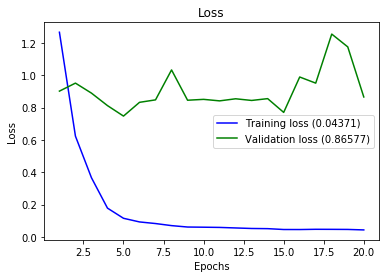

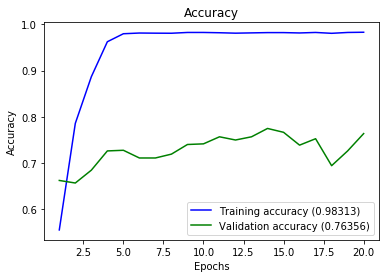

1795/1795 [==============================] - 0s 97us/sample - loss: 0.8611 - sparse_categorical_accuracy: 0.7577
Test accuracy: 0.7576601505279541


In [169]:
history = model.fit(X_train_p, y_train, epochs=20, batch_size=128,validation_split=0.1)
plot_history(history)
test_loss, test_acurracy = model.evaluate(X_test_p, y_test)
print("Test accuracy: {}".format(test_acurracy))

In [0]:
model.optimizer.lr = 0.0001

Train on 6463 samples, validate on 719 samples
Epoch 1/20
6463/6463 [==============================] - 1s 91us/sample - loss: 0.0301 - sparse_categorical_accuracy: 0.9856 - val_loss: 0.8160 - val_sparse_categorical_accuracy: 0.7705
Epoch 2/20
6463/6463 [==============================] - 1s 90us/sample - loss: 0.0271 - sparse_categorical_accuracy: 0.9858 - val_loss: 0.8033 - val_sparse_categorical_accuracy: 0.7747
Epoch 3/20
6463/6463 [==============================] - 1s 91us/sample - loss: 0.0256 - sparse_categorical_accuracy: 0.9858 - val_loss: 0.8040 - val_sparse_categorical_accuracy: 0.7733
Epoch 4/20
6463/6463 [==============================] - 1s 89us/sample - loss: 0.0258 - sparse_categorical_accuracy: 0.9858 - val_loss: 0.8168 - val_sparse_categorical_accuracy: 0.7691
Epoch 5/20
6463/6463 [==============================] - 1s 92us/sample - loss: 0.0246 - sparse_categorical_accuracy: 0.9872 - val_loss: 0.8210 - val_sparse_categorical_accuracy: 0.7705
Epoch 6/20
6463/6463 [======

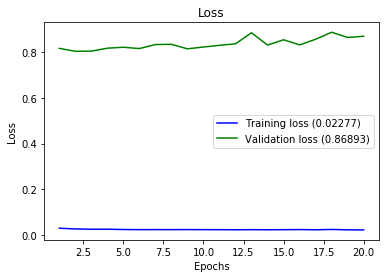

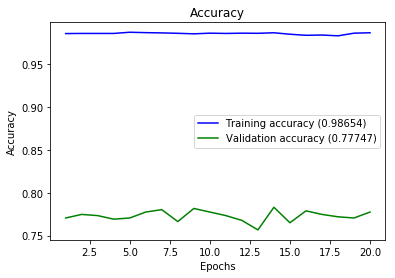

1795/1795 [==============================] - 0s 93us/sample - loss: 0.8870 - sparse_categorical_accuracy: 0.7554
Test accuracy: 0.7554317712783813


In [171]:
history = model.fit(X_train_p, y_train, epochs=20, batch_size=128,validation_split=0.1)
plot_history(history)
test_loss, test_acurracy = model.evaluate(X_test_p, y_test)
print("Test accuracy: {}".format(test_acurracy))

In [0]:
model.optimizer.lr = model.optimizer.lr / 10

Train on 6463 samples, validate on 719 samples
Epoch 1/20
6463/6463 [==============================] - 1s 108us/sample - loss: 0.0229 - sparse_categorical_accuracy: 0.9862 - val_loss: 0.8550 - val_sparse_categorical_accuracy: 0.7761
Epoch 2/20
6463/6463 [==============================] - 1s 92us/sample - loss: 0.0210 - sparse_categorical_accuracy: 0.9878 - val_loss: 0.8541 - val_sparse_categorical_accuracy: 0.7775
Epoch 3/20
6463/6463 [==============================] - 1s 89us/sample - loss: 0.0215 - sparse_categorical_accuracy: 0.9876 - val_loss: 0.8542 - val_sparse_categorical_accuracy: 0.7775
Epoch 4/20
6463/6463 [==============================] - 1s 91us/sample - loss: 0.0217 - sparse_categorical_accuracy: 0.9879 - val_loss: 0.8560 - val_sparse_categorical_accuracy: 0.7789
Epoch 5/20
6463/6463 [==============================] - 1s 88us/sample - loss: 0.0216 - sparse_categorical_accuracy: 0.9873 - val_loss: 0.8535 - val_sparse_categorical_accuracy: 0.7775
Epoch 6/20
6463/6463 [=====

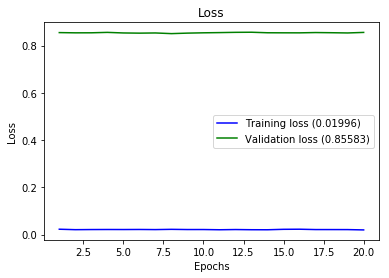

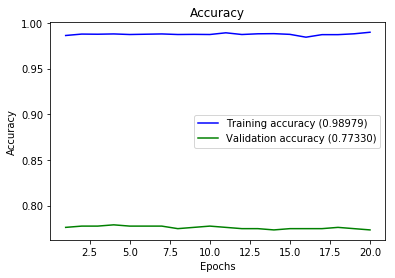

1795/1795 [==============================] - 0s 101us/sample - loss: 0.8745 - sparse_categorical_accuracy: 0.7604
Test accuracy: 0.7604456543922424


In [173]:
history = model.fit(X_train_p, y_train, epochs=20, batch_size=128,validation_split=0.1)
plot_history(history)
test_loss, test_acurracy = model.evaluate(X_test_p, y_test)
print("Test accuracy: {}".format(test_acurracy))